In [ ]:
!pip install pmdarima
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Regressão

## **Tema - Preço de casas**

O preço de uma casa varia bastante de acordo com as suas características. Podemos citar tanto fatores estruturais, como número de quartos, banheiros, tamanho da sala, jardim, entre outros. Além disso também temos fatores externos, como localização e acesso aos serviços. Neste caso aqui, a base de dados utilizada possui registros de diversas residências na região metropolitana de Seattle - EUA (algo a se notar é que o conjunto usado possui penas fatores internos). **Desse modo, o objetivo desta etapa será criar um modelo de regressão linear que consiga prever o preço das casas baseadas nesses atributos(features).**

##**Colunas**
- id: Identificador único da casa vendida
- date: Data da venda
- price: Preço negociado
- bedrooms: Número de quartos
- bathrooms: Número de banheiros (0.5 significa lavabo)
- sqft_living: Área da sala de estar (em pés)
- sqft_lot: Área do terreno todo (em pés)
- floors: Número de andares
- waterfront: Se o lugar tem vista de frente para algum corpo de água
- view: Um índice de 0 a 4 referente a avaliação da vista do lugar
- condition: Um índice de 1 a 5 referente as condições estruturais do lugar
- grade: Um índice que mede a qualidade da construção de design da casa
- sqft_above: Área total dos pisos superiores (em pés)
- sqft_basement: Área total dos pisos abaixo do nível do solo (em pés)
- yr_built: Ano de construção
- yr_renovated: Ano de renovação (0 = não foi renovada)
- zipcode: Código postal
- lat: Latitude
- long: Longitude
- sqft_living15: Áreas médias da sala de estar dos 15 vizinhos mais próximos  (em pés)
- sqft_basement15: Áreas médias dos pisos abaixo do nível do solo dos 15 vizinhos mais próximos  (em pés)


In [ ]:
casas = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')
casas.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


## **Analise exploratoria**

In [ ]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
casas.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


- Primeiramente vemos que a base de dados contém 21613 registros e 21 colunas.
- Segundo a estatísticas descritivas, todos os valores das colunas aparentam estar devidamente preenchidos, sem valores nulos. No entanto, existem alguns registros de casas apontam que elas não tem banheiro. Irei remover essas linhas posteriormente para evitar possíveis equívocos na análise.
- Vemos que o número médio de quartos é 3 e o de banheiros é 2. Além disso, a média da área da sala de estar é de 2000 pés. Isso mostra um pouco do padrão cultural dos norte americanos.
- O preço médio das casas na região metropolitana de Seattle fica em torno de 500 mil dólares  


In [ ]:
casas.drop(casas[casas['bathrooms'] == 0].index,inplace = True)

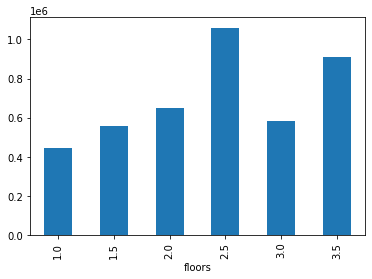

In [ ]:
casas.groupby('floors')['price'].mean().plot.bar()

O gráfico de barras revela algo bem intuitivo. O preço médio das casas tende a aumentar conforme o número de pisos aumenta. Contudo, ele curiosamente diminuiu após o valor 2.5. Uma possível explicação para isso pode ser a influência de outros fatores no preço, como localização do imóvel por exemplo.

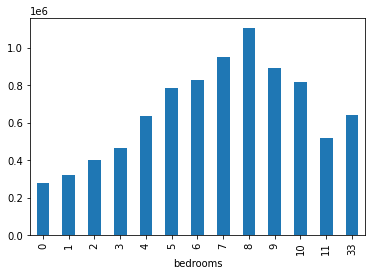

In [ ]:
casas.groupby('bedrooms')['price'].mean().plot.bar()

Vemos um fenômeno parecido em relação ao número de quartos. Aqui o preço médio também aumenta conforme o número de quartos, mas a partir de 8 quartos ele diminui. Como dito anteriormente, isso pode estar relacionado ao valor do terreno em uma certa região, mas não há evidências disso.

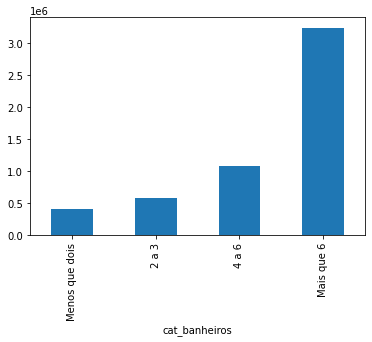

In [ ]:
labels = ['Menos que dois','2 a 3','4 a 6','Mais que 6']
bins = [0,2,3,6,100]
casas['cat_banheiros'] = pd.cut(casas['bathrooms'], bins = bins, labels = labels)
casas.groupby('cat_banheiros')['price'].mean().plot.bar()

Comparando agora o preço médio pelo número de banheiros, é possível observar que nesse caso que há uma proporção direta entre esses dois fatores. Banheiros geralmente aumentam o valor da construção pois é necessária uma infraestrutura extra de saneamento básico para atender, então essa elevação do custo faz sentido.

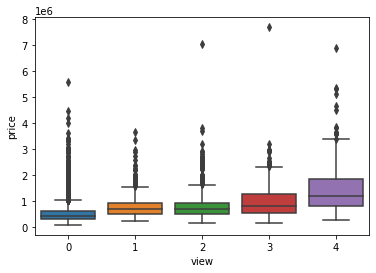

In [ ]:
sns.boxplot(x='view', y='price',data=casas)

Em relação à avaliação da vista, vemos nitidamente no gráfico boxplot que os valores de compra tendem a ser maiores conforme a avaliação for melhor. Ainda é possível ver a presença de muitos outliers, que podem ser as residências com a presença de outros fatores relevantes, como número de banheiros por exemplo.

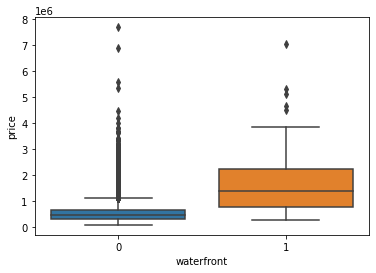

In [ ]:
sns.boxplot(x='waterfront', y='price',data=casas)

Uma vista para um corpo d'água é algo muito valorizado pelas pessoas. Muitos estudos apontam que morar em um lugar com vista para um rio ou para o mar tende a deixar as pessoas mais tranquilas, além de "garantir" um certo status social. Desse modo, vemos que casas com vista para um rio/mar/lago possuem um valor médio nitidamente maior em comparação a aquelas que não possuem. Apesar da grande quantidade dos outliers, que indicam outros fatores a serem levados em consideração.

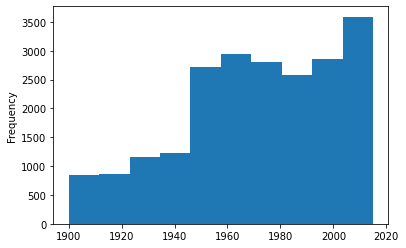

In [ ]:
casas['yr_built'].plot.hist()

O histograma mostra que a maioria das casas naquela região foi construída a partir da década de 50. Justamente na época de expansão econômica dos EUA durante o pós guerra. A partir de 2010 também vemos um grande número de novas casas sendo construídas na região.

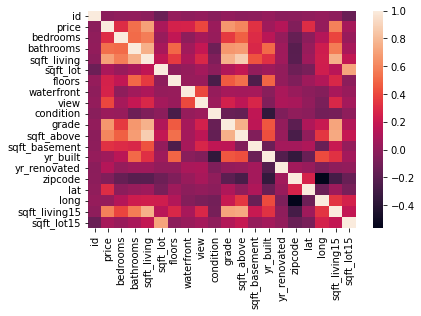

In [ ]:
sns.heatmap(casas.corr())

Analisando a matriz de correlação, é perceptível que as maiores correlações com o preço do imóvel  acontecem na área da sala de estar, número de banheiros, avaliação das condições, área dos pisos superiores e área média dos 15 vizinhos mais próximos. Podemos concluir que todas essas variáveis são diretamente proporcionais ao preço do imóvel. Não foram encontradas que influenciem inversamente nesse caso.

## **Modelo**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


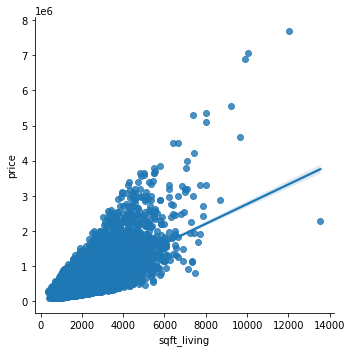

In [ ]:
sns.lmplot('sqft_living','price',data=casas)

Como dito anteriormente e agora realizando o gráfico de regressão linear, vemos mais uma vez que existe uma relação de proporção direta entre os valores da área da sala de estar e o preço da casa.

In [ ]:
casas = casas.dropna()
treino, teste = train_test_split(casas, train_size=0.65)

Aqui foi feita a separação (treino 65%) e teste(35%)

In [ ]:
features_rl = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']
from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit(treino[features_rl] ,treino['price'])
print(rl.coef_,rl.intercept_)

[-3.47029546e+04  4.38363469e+04  1.03771373e+02 -2.08585525e-02
  2.90514599e+04  6.35740111e+05  4.27722038e+04  1.82717203e+04
  1.20128041e+05  4.68959181e+01  5.68754543e+01 -3.58769472e+03
  8.10276356e+00  2.92568749e+01 -4.51126822e-01] 6226401.477769676


Aqui foi criado o modelo de regressão linear em que foi realizado o fit com as features e após isso foram obtidos os coeficientes de regressão de cada feature usada. Os coeficientes de regressão linear podem ser utilizados para prever novos valores, já que se criarmos uma função que calcula a soma das multiplicações dos coeficientes pelos valores presentes em um registro. O resultado é o preço estimado daquela casa somado com 6186110.

In [ ]:
rl.score(treino[features_rl],treino['price'])

0.6601779526459778

Um score de treino equivalente a 65% não é o cenário ideal para o modelo, visto que ele ainda tem uma margem de erro grande. No entanto, precisamos levar em conta que o preço das residências também varia muito de acordo com a valorização do terreno, que não é algo presente no dataset. Sendo assim, podemos considerar um desempenho aceitável.

In [ ]:
prevs_precos = rl.predict(teste[features_rl])
metrics.r2_score(teste['price'],prevs_precos)

0.6425590231680992

Comparando agora em teste, vemos que a acuracia se manteve em 65%. Isso indica que pelo menos não houve um overfit e o modelo seguiu os critérios estabelecidos em treino.

In [ ]:
def predict_price(features):
  count = 0
  sumprice = 6226401
  for feature in features:
    sumprice += feature * rl.coef_[count]
    count += 1
  return sumprice

Essa função retorna o preço estimado de um novo registro de casa, considerando uma série de features e os coeficientes obtidos. Desse modo, vamos calcular o preço estimado de uma casa de um novo registro:

In [ ]:
regs = [4,2.25,2570,7242,2,0,1,2,2170,400,1951,1991,1690,7639]
print(predict_price(regs))

250141042.1909827


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Preço real'), Text(0.5, 0, 'Preço previsto')]

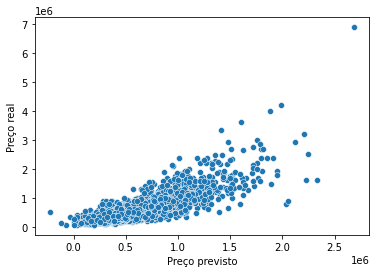

In [ ]:
ax = sns.scatterplot(prevs_precos,teste['price'])
ax.set(xlabel='Preço previsto', ylabel='Preço real')

Comparando as previsões feitas pelo modelo com os preços reais, vemos que para valores mais baixos, o modelo tem uma boa eficiência na sua projeção. Porém, quanto maior o preço, mais dificuldades o modelo encontra para fazer essa avaliação, dado que a disperção aumenta. Contudo, se tratando do nosso contexto, podemos concluir que o modelo apresentou um resultado aceitável.

# Classificação

## Tema - Satisfação dos passageiros

Muitas companhias aéreas coletam dados a respeito da satisfação dos seus clientes durante um vôo. É muito importante que elas mantenham um bom nível de aprovação, dado que é necessário eter o maior número de clientes possível por meio de um serviço de excelência. Existe, no entanto, um grande desafio na hora de descobrir os principais fatores que levam a satisfação/insatisfação de um passageiro. Geralmente são questões pessoais de cada um. No entanto, ao olhar dados de diversos passageiros pode ser possível verificar os principais pontos que são levado emconta nessa avaliação. Desse modo o dataset que usarei para esta fase possui registros referentes aos vôos de passageiros e algumas características como avaliações gerais.  Sendo assim, o objetivo da fase atual será criar um modelo de árvore de decisão que consiga classificar quando um passageiro se sentirá satisfeito ou não com o serviço. Esse modelo pode ajudar a companhia aérea na questão de prioridades durante todo o serviço.

## **Colunas**

- Gender: Gênero do passageiro (0 = mulher, 1 = homem)

- customer_type: Categoria do passageiro (Leal,desleal)

- age: idade do passageiro

- type_of_travel
  - Trabalho
  - Pessoal

- customer_class: class que o passageiro obteve no vôo
  - Econômica
  - Econômica plus
  - executiva

- flight_distance: distância do vôo (em km)

- inflight_wifi_service: avaliação de 1 a 5 referente ao serviço de wi-fi durante o vôo

- departure_arrival_time_convenient: avaliação de 1 a 5 referente à conveniência do tempo de partida

- ease_of_online_booking: avaliação de 1 a 5 referente ao serviço de livros online durante o vôo

- gate_location: avaliação de 1 a 5 referente a localização do terminal

- food_and_drink: avaliação de 1 a 5 referente ao serviço de comida durante o vôo

- online_boarding: avaliação de 1 a 5 referente ao serviço de compra das passagens online

- seat_comfort: avaliação de 1 a 5 referente ao conforto do assento durante o vôo

- inflight_entertainment: avaliação de 1 a 5 referente ao serviço de entretenimento durante o vôo

- onboard_service: avaliação de 1 a 5 referente ao serviço de bordo durante o vôo

- leg_room_service: avaliação de 1 a 5 referente ao espaço livre para as pernas nos assentos

- baggage_handling: avaliação de 1 a 5 referente ao tratamento das bagagens

- checkin_service: avaliação de 1 a 5 referente ao serviço de check-in

- inflight_service: avaliação de 1 a 5 referente ao serviço geral dos funcionários durante o vôo

- cleanliness: avaliação de 1 a 5 referente ao serviço de limpeza durante o vôo

- departure_delay_in_minutes: atraso da partida em minutos

- arrival_delay_in_minutes: atraso da chegada em minutos

- satisfaction:
  - Satisfeito
  - Neutro/Insatisfeito

In [ ]:
passageiros = pd.read_csv('/content/drive/MyDrive/airline_passenger_satisfaction.csv')
passageiros.head(4)

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied


## Análise exploratória

In [ ]:
passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [ ]:
passageiros.describe(include='all')

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,129880.000000,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880
unique,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73452
mean,64939.500000,NaN,NaN,39.427957,NaN,NaN,1190.316392,2.728696,3.057599,2.756876,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,NaN
std,37493.270818,NaN,NaN,15.119360,NaN,NaN,997.452477,1.329340,1.526741,1.401740,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,NaN
min,0.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,32469.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,64939.500000,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,97409.250000,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


Como é possível observar, a idade média dos passageiros é de 39 anos, enquanto a distância média dos vôos é de 1190 km.

No geral, as avaliações médias quanto a algumas características:
  - wifi: 2.7
  - conveniência do tempo e embarque: 3
  - serviço de leitura online: 2.7
  - entretenimento durante o vôo: 3.35
  - serviço de bordo: 3.38
  - espaço para as pernas no assento: 3.35

Vemos que as avaliações médias não diferem muito de si, então ao que parece o dataset é coerente. Além disso não foi observada a presença de valores nulos, pois todas as colunas estão preenchidas com o mesmo número de registros. Isso é bom, pois facilita a elaboração do modelo depois.

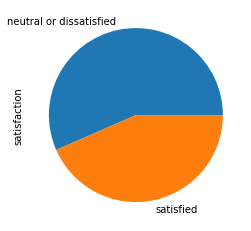

In [ ]:
passageiros['satisfaction'].value_counts().plot.pie()

É possível notar pelo gráfico de pizza que apesar da boa quantidade de avaliações positivas, ainda existem muitos passageiros que avaliaram como neutro/insatisfeito. Para uma companhia que busca um serviço de excelência, entender os fatores que levam a essa avaliação é muito importante.

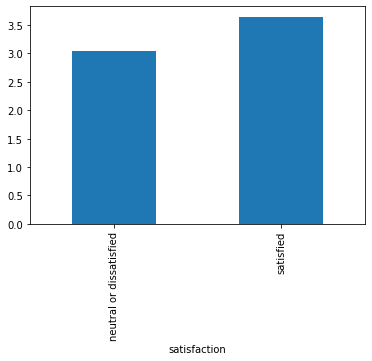

In [ ]:
passageiros.groupby('satisfaction')['checkin_service'].mean().plot.bar()

Analisando primeiro o serviço de check/in, vemos que há uma pequena diferença entre a satisfação dos passageiros e a classificação do check-in. Passageiros que se sentiram satisfeitos avaliaram o serviço de check-in com uma média de 3.5 enquanto aqueles insatisfeitos possuem uma média um pouco abaixo (de 3). Um bom serviço de check-in é essencial para que o passageiro não passe por algum problema e reconheça que a companhia preza a praticidade de todo o processo do embarque. Sendo assim, é um ponto importante a se focar.

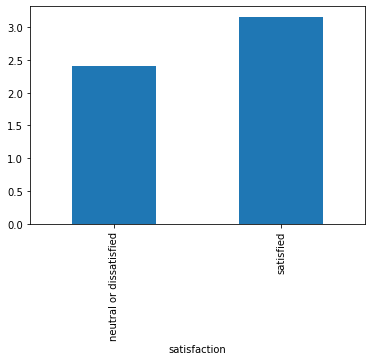

In [ ]:
passageiros.groupby('satisfaction')['inflight_wifi_service'].mean().plot.bar()

O serviço de wi-fi dentro do vôo também pode ser considerado um fator importante. Vemos que a avaliação média de passageiros que se sentiram satisfeitos com o serviço de wi-fi é nitidamente maior que aqueles insatisfeitos. Em um mundo em que a informação é essencial, muitos passageiros necessitam de um bom wi-fi para realizar suas atividades durante o vôo, seja trabalho ou acesso as redes sociais. Logo, é importante que a empresa foque nisso também.

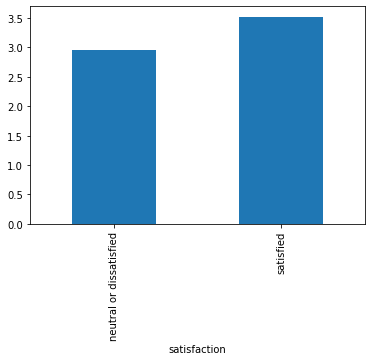

In [ ]:
passageiros.groupby('satisfaction')['food_and_drink'].mean().plot.bar()

Quanto ao serviço de comida, também é notável uma diferença na avaliação média dos passageiros. Em vôos muito longos, uma boa qualidade dos alimentos oferecidos pela companhia é essencial para manter uma boa satisfação.

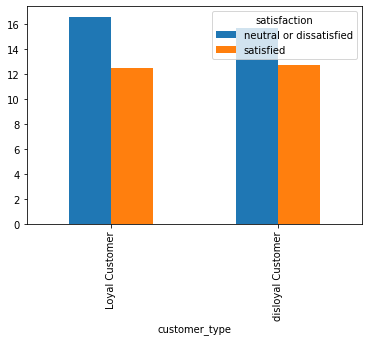

In [ ]:
import numpy as np
pd.pivot_table(passageiros, values='departure_delay_in_minutes', index=['customer_type'], columns=['satisfaction'], aggfunc=np.mean).plot.bar()

Vemos nesse gráfico que quanto maior o atraso do embarque em minutos, maior a presença de insatisfação entre os passageiros, independente se eles são considerados clientes leais ou não.

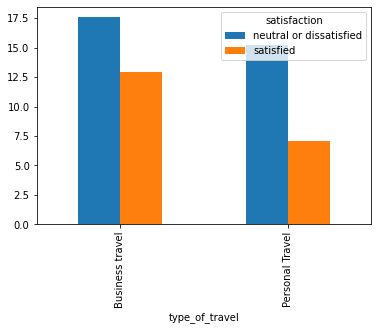

In [ ]:
pd.pivot_table(passageiros, values='departure_delay_in_minutes', index=['type_of_travel'], columns=['satisfaction'], aggfunc=np.mean).plot.bar(legend=True)

Analisando ainda o atraso do tempo de embarque, vemos que pessoas com viagens de objetivos pessoais tendem a se sentir menos satisfeitos com um tempo de atraso menor se comparados proporcionalmente com clientes que possuem viagens com objetivos de trabalho. Existem muitos fatores que levam ao atraso de viagens, e um dos principais deles é o clima. Como isso está fora do controle da companhia, não há como tomar uma ação direta a respeito. O máximo que se pode fazer é avisar os clientes com a maior antecedência possível.

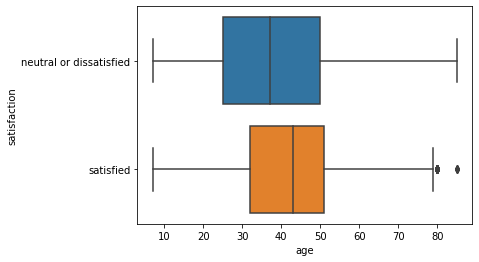

In [ ]:
sns.boxplot(x='age', y='satisfaction',data=passageiros)

Quanto ao nível de satisfação em comparação com a idade dos passageiros, vemos que a maioria dos clientes fizeram uma avaliação positiva do vôo estão na faixa dos 30-50 anos, enquanto aqueles que fizeram uma avaliação negativa estão mais concentrados entre os 25-35 anos.

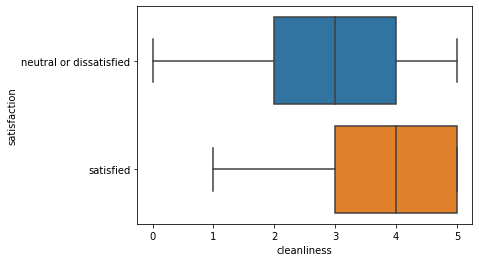

In [ ]:
sns.boxplot(x='cleanliness', y='satisfaction',data=passageiros)

Outro fator muito importante é a limpeza. Nesse boxplot vemos que a maioria dos clientes que se sentiram satisfeitos avaliaram melhor o nível de limpeza (entre 3 e 5, com um limite inferior de 1) em comparação com os passageiros que se sentiram insatisfeitos (entre 2 e 3, com um limite inferior de 0).

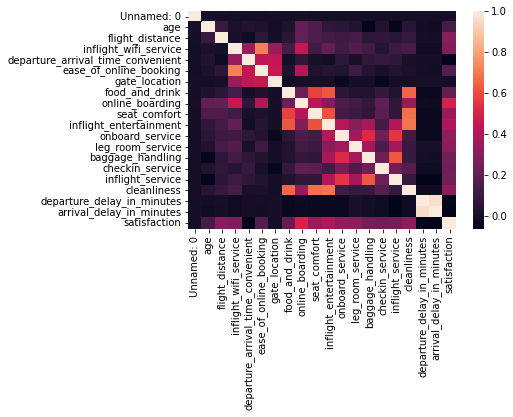

In [ ]:
passageiros['satisfaction'] = passageiros['satisfaction'].replace({'neutral or dissatisfied':0,'satisfied':1})
sns.heatmap(passageiros.corr())

O mapa de correlação evidencia que os fatores que mais influenciam positivamente o nível de satisfação são serviço de compra de passagem online, entretenimento durante o vôo , limpeza e conforto do assentp. Enquanto isso, todos os valores referentes aos atrasos influenciam negativamente.

## Modelo

In [ ]:
passageiros = passageiros.dropna()
treino_tree, teste_tree = train_test_split(passageiros, train_size=0.8)

Dividindo a base de dados em 80% treino e 20% teste.

In [ ]:
features_tree = ['flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'onboard_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
from sklearn.tree import DecisionTreeClassifier
arv = DecisionTreeClassifier(max_depth=2)
arv.fit(treino_tree[features_tree],treino_tree['satisfaction'])
arv.score(treino_tree[features_tree],treino_tree['satisfaction']) * 100


81.32523723561383

Aqui foi feita a separação das features que serão usadas para o treino. Após criar o modelo da árvore de decisão com profundidade máxima de 2 e realizado o fit, houve uma acurácia de 80%. Essa acurácia é muito boa para o contexto de negócio do modelo. Ele consegue prever bem quando um passageiro avaliará positivamente ou negativamente o serviço geral do vôo. Como o objetivo é identificar fatores a se priorizar, o resultado é bem válido por enquanto.

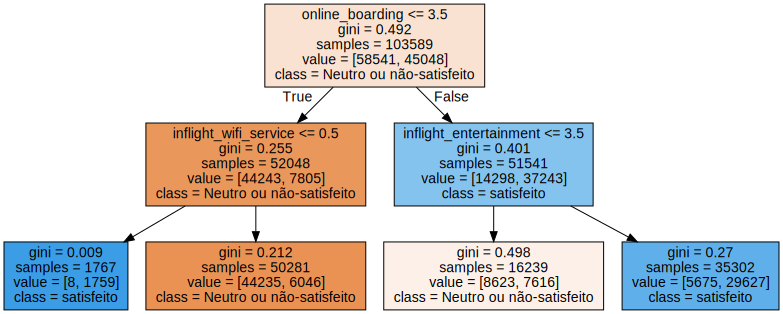

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz(arv,filled=True,feature_names =features_tree, class_names = ['Neutro ou não-satisfeito','satisfeito'])
Source (dot_data)

- A primeira avaliação feita pela árvore foi o serviço de compra de passagens online. Se o cliente avaliar ele com um índice menor que 3.5, vemos que existe uma boa chance de ele se sentir insatisfeito. Caso isso ocorra e a avaliação do serviço de wi-fi for menor que 0.5, há uma chance maior ainda de que ele se sinta insatisfeito. Caso contrário, o modelo aponta que existe uma boa chance dele se sentir satisfeito.
- Analisando o ramo mais à direita agora, se o passageiro avaliar o serviço online de vôo como maior que 3.5 e um serviço de entretenimento maior que 3.5 também, a chance de ele se sentir satisfeito é bem alta. Caso contrário, a chance dele se sentir insatisfeito ainda é presente.
- Esse gráfico revela os fatores mais importantes no contexto da companhia: serviço de compra online, wifi e entretenimento.

In [ ]:
from sklearn.metrics import accuracy_score
p_teste = arv.predict(teste[features_tree])
y_teste = teste['satisfaction']
acuracia_Teste = accuracy_score(p_teste, y_teste)
acuracia_Teste * 100

80.96764228897985

Com uma acurácia de teste equivalente a 80%, vemos de cara que não houve um overfit e o modelo conseguiu boas classificações. Basta saber agora a quantidade de acertos e erros.

[[13093  1469]
 [ 3460  7876]]


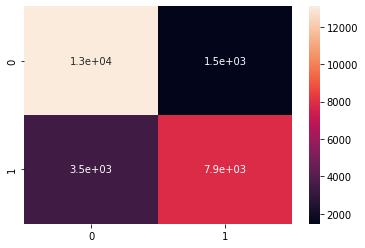

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste,p_teste)
print(cm)
sns.heatmap(cm,annot=True)

Analisando a matriz de confusão, vemos que o modelo teve mais precisão em avaliar a insatisfação dos clientes (13093 TN e 1400 FN) do que a satisfação em si (7876 TP e 3460 FP). No contexto do negócio, não existe um que seja mais prejudicial. Ambos revelam informações importantes sobre o que priorizar no serviço. O que se pode entender é que o modelo serve bem para o objetivo dele.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,p_teste))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     14562
           1       0.84      0.69      0.76     11336

    accuracy                           0.81     25898
   macro avg       0.82      0.80      0.80     25898
weighted avg       0.81      0.81      0.81     25898



Aqui vemos uma precisão de 80% nos negativos com um recall de 90%, enfatizando o que foi falado anteriormente. Como positivos, temos uma precisão de 84%, porém com um recall mais baixo de 70%

# Agrupamento

## Análise exploratória
Irei usar a mesma base de dados que foi utilizada na etapa de classificação. No caso do agrupamento, utilizarei as regras de associação de apriori.

## Modelo

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

features_dumm = ['Gender','customer_type','customer_class','inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'onboard_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']
lista_dummies = []
for c in features_dumm:
    novosdm = pd.get_dummies(passageiros[c])
    novosdm.columns=[c + '_' + str(p) for p in passageiros[c].unique()]
    lista_dummies.append(novosdm)
novodf=pd.concat(lista_dummies,axis=1 )

novodf.head()

,Gender_Male,Gender_Female,customer_type_Loyal Customer,customer_type_disloyal Customer,customer_class_Eco Plus,customer_class_Business,customer_class_Eco,inflight_wifi_service_3,inflight_wifi_service_2,inflight_wifi_service_4,...,inflight_service_3,inflight_service_1,inflight_service_2,inflight_service_0,cleanliness_5,cleanliness_1,cleanliness_2,cleanliness_3,cleanliness_4,cleanliness_0
0,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


Antes de aplicar as regras de associação, é necessário transformar as colunas em dummies. Para isso criei um laça de repetição que percorre cada coluna e a transforma em um dummy com um nome adequado, que diferencia bem as colunas. Feito isso, vou aplicar as regras.

In [ ]:
association_rules(apriori(novodf, min_support=0.25, use_colnames=True))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gender_Male),(customer_type_Loyal Customer),0.507410,0.816862,0.408527,0.805123,0.985629,-0.005956,0.939763
1,(Gender_Female),(customer_type_Loyal Customer),0.492590,0.816862,0.408334,0.828954,1.014803,0.005956,1.070695
2,(customer_class_Eco Plus),(customer_type_Loyal Customer),0.478735,0.816862,0.407608,0.851428,1.042315,0.016548,1.232652
3,(online_boarding_4),(customer_type_Loyal Customer),0.296192,0.816862,0.259694,0.876776,1.073347,0.017746,1.486224
4,(seat_comfort_4),(customer_type_Loyal Customer),0.306216,0.816862,0.268930,0.878238,1.075136,0.018794,1.504061
5,(baggage_handling_1),(customer_type_Loyal Customer),0.360121,0.816862,0.288801,0.801956,0.981752,-0.005368,0.924733
6,(inflight_service_2),(customer_type_Loyal Customer),0.364500,0.816862,0.292778,0.803233,0.983316,-0.004968,0.930737


- Com um suporte mínimo de 25%, o modelo fez muitas associações. Vemos que todas elas associam algumas colunas com o aspecto dos clientes serem leais. Primeiro tempos homens com um antecedente de 0.5 para 0.81 de consequente. Além disso, mulheres possuem essa mesma associação com um antecedente de 0.49.
- Outra associação foi criada mas no caso referente à categoria da viagem. Clientes com um antecedente de 0.47 de classe econômica possuem um consequente de 0.81 de serem clientes leais.
- Uma associação parecida foi feita com uma avaliação 4 de compra de passagens online. com um antecedentes de 0.29 e um consequente de 0.81 para ser um cliente leal.
- Além isso vemos que uma avaliação 4 de conforto de assento foi associada com o aspecto de um cliente ser leal, tendo um antecedente de 0.30 e um consequente de 0.81.

# Série temporal
## Tema - Ações da microsoft

A microsoft é uma empresa que já está a muito tempo no mercado. Ela é considerada uma gigante não só no segmento da tecnologia, mas como em vários outros. Sendo assim, ela possui uma margem boa de lucro e atrai muitos investidores para comprar seus ativos. O dataset contém rgistros dos preços de ativos da microsoft de 1986 até 2022. O objetivo aqui é tentar fazer um forecast dos valores de abertura das ações da microsoft.

## Colunas

- Date: Data do registro
- Open: Valor de abertura
- High: Valor mais alto no dia do registro
- Low: Valor mais alto no dia do registro
- Close: Valor de fechamento no dia do registro
- Adj close: Variação entre abertura e fechamento (em %)
- Volume: Volume de transações no dia do registro

In [ ]:
ms_stocks = pd.read_csv('/content/drive/MyDrive/MicroSoft.csv')
ms_stocks.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400


## Análise estatística

In [ ]:
ms_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9123 entries, 0 to 9122
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9123 non-null   object 
 1   Open       9123 non-null   float64
 2   High       9123 non-null   float64
 3   Low        9123 non-null   float64
 4   Close      9123 non-null   float64
 5   Adj Close  9123 non-null   float64
 6   Volume     9123 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 499.0+ KB


In [ ]:
ms_stocks.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,9123,9123.000000,9123.000000,9123.000000,9123.000000,9123.000000,9.123000e+03
unique,9123,NaN,NaN,NaN,NaN,NaN,NaN
top,1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,42.392231,42.840677,41.925526,42.396929,37.239967,5.863917e+07
std,NaN,61.709954,62.312698,61.039026,61.704540,61.909650,3.840892e+07
min,NaN,0.088542,0.092014,0.088542,0.090278,0.056745,2.304000e+06
25%,NaN,4.386719,4.445312,4.343750,4.378906,2.752384,3.451390e+07
50%,NaN,26.850000,27.139999,26.580000,26.870001,18.936142,5.192870e+07
75%,NaN,40.425938,40.914062,39.849998,40.341875,29.389076,7.246935e+07


Vemos que o valor mínimo de abertura encontrado foi 0.08, que deve ser referente aos primeiros anos da empresa. O valor máximo é de 334, e deve se referir ao momento atual em que a empresa possui um grande valor de mercado. No mais, temos que o maior valor até hoje foi de 349 dólares.
O volume de transações já teve um mínimo de 2 milhões de transações ao dia e um máximo de 1 bilhão por dia, o que só pode ser explicado pela presença de robôs que fazem processos de compra e venda de ativos automaticamente nos dias de hoje.

## Modelo

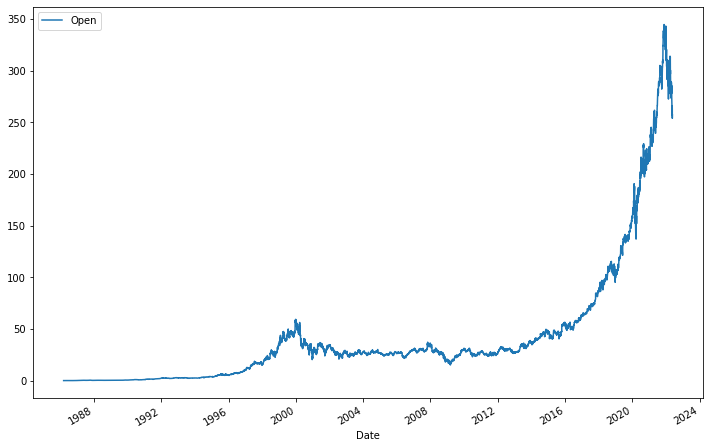

In [ ]:
ms_stocks["Date"] = pd.to_datetime(ms_stocks["Date"])
ms_stocks.index = ms_stocks['Date']
ms_stocks = ms_stocks.drop(columns=['Date','High','Low','Adj Close','Close','Volume'])
ms_stocks.plot(figsize=(12,8))

O gráfico mostra que a chance da base ser estacionária é bem baixa, pois os valores variaram muito ao longo do tempo. Além disso, vemos que não há uma sazonalidade aqui pois não é possível enxergar regularidade temporais ao olhar esse gráfico. Desse modo, vamos ferificar a estacionariedade com a função adfuller.

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(ms_stocks['Open'])

(3.1973263796137315,
 1.0,
 36,
 9086,
 {'1%': -3.4310699150803217,
  '10%': -2.56693934945597,
  '5%': -2.861858156116734},
 30370.33723479991)

Como podemos ver, temos um valor 0 positivo e um valor p equivalente a 1, o que significa 100% de probabilidade da série ser não-estacionária. Nesse caso, é necessário fazer uma transformação nela antes de aplicar o modelo arima.

In [ ]:
abertura_ok = ms_stocks.diff().dropna()

Fazendo as diferenciações para ter uma chance de estacionariedade menor.

In [ ]:
adfuller(abertura_ok['Open'])

(-14.753688865646152,
 2.4625951501960266e-27,
 38,
 9083,
 {'1%': -3.4310701529264156,
  '10%': -2.566939405401195,
  '5%': -2.8618582612166548},
 30364.0747327415)

In [ ]:
treino_arima = abertura_ok.loc['13-03-1986':'05-03-2016']
teste_arima = abertura_ok.loc['06-03-2016':]
print(treino_arima.shape + teste_arima.shape)

(8353, 1, 750, 1)


Com uma chance de ser estacionária tendendo a 0 agora, é possível aplicar o modelo de autoregressão temporal e fazer um forecast. Antes de tudo, foi necessário transformar a base de dados em 90% treino e 10% teste

In [ ]:
from pmdarima.arima import auto_arima
arr = auto_arima(treino_arima,trace = True,m=5)
arr.fit(treino_arima)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=11345.844, Time=22.72 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=11345.204, Time=0.62 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=11342.608, Time=1.51 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=11342.584, Time=2.33 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=11344.480, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[5] intercept   : AIC=11342.608, Time=0.76 sec
 ARIMA(0,0,1)(1,0,1)[5] intercept   : AIC=11343.772, Time=6.65 sec
 ARIMA(0,0,1)(0,0,2)[5] intercept   : AIC=11341.804, Time=3.54 sec
 ARIMA(0,0,1)(1,0,2)[5] intercept   : AIC=11343.740, Time=9.20 sec
 ARIMA(0,0,0)(0,0,2)[5] intercept   : AIC=11344.220, Time=2.90 sec
 ARIMA(1,0,1)(0,0,2)[5] intercept   : AIC=11341.725, Time=16.01 sec
 ARIMA(1,0,1)(0,0,1)[5] intercept   : AIC=11342.590, Time=16.45 sec
 ARIMA(1,0,1)(1,0,2)[5] intercept   : AIC=11344.696, Time=16.89 sec
 ARIMA(1,0,1)(1,0,1)[5] intercept   : AIC=11343.804, Time=11.43 sec
 ARIMA(1,0,0)(

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(0, 0, 2, 5),
      suppress_warnings=True, with_intercept=False)

O melhor modelo obtido foi uma autoregressão de 1, média móvel de 0 e integração de 1. ARIMA(1,0,1). Feito isso, vamos fazer o forecast para os próximos 35 períodos.

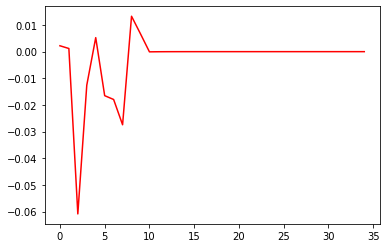

In [ ]:
pred = arr.predict(35)
plt.plot(pred,color='red')

Ao analisar o forecast dos próximos 35 períodos, vemos que há uma queda significativa na variação dos valores de abertura nos primeiros 3 dias, mas com uma subida. Depois, ocorre uma oscilação entre o quarto e décimo período. Após isso, a variação do valor de abertura tende a uma estagnação para o restante dos períodos. Sendo assim, o modelo fez um bom forecast dos valores de abertura e poderia ser usado no contexto do mercado financeiro.